## Package Loading


In [1]:
! pip uninstall numpy
! pip install numpy==1.26.4 --force-reinstall

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/numpy-config
    /usr/local/lib/python3.11/dist-packages/numpy-2.0.2.dist-info/*
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libgfortran-040039e1-0352e75f.so.5.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libquadmath-96973f99-934c22de.so.0.0.0
    /usr/local/lib/python3.11/dist-packages/numpy.libs/libscipy_openblas64_-99b71e71.so
    /usr/local/lib/python3.11/dist-packages/numpy/*
Proceed (Y/n)? Y
Y
  Successfully uninstalled numpy-2.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 511.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 32.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 whic

In [2]:
! pip uninstall pandas
! pip install pandas==2.2.2

Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/pandas-2.2.2.dist-info/*
    /usr/local/lib/python3.11/dist-packages/pandas/*
Proceed (Y/n)? Y
Y
  Successfully uninstalled pandas-2.2.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 57.8 MB/s eta 0:00:00


In [3]:
! pip uninstall multimethod
! pip install multimethod==1.9

In [4]:
!pip install statsbombpy
!pip install socceraction

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: lxml
    Found existing installation: lxml 5.4.0
    Uninstalling lxml-5.4.0:
      Successfully uninstalled lxml-5.4.0


In [5]:
import numpy as np
print(np.__version__)

2.0.2


In [1]:
import socceraction.spadl as spadl
import socceraction.vaep.features as fs
import warnings

/usr/local/lib/python3.11/dist-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


In [2]:
import pandas as pd
from statsbombpy import sb
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

## Data Preparation

In [ ]:
matches = sb.matches(competition_id=2, season_id=27)
warnings.simplefilter("ignore", category=UserWarning)
events = pd.concat([sb.events(match_id=x) for x in matches['match_id']])
match_date = matches[['match_id','match_date']]
events = events.merge(match_date,on='match_id',how='left')
events['50_50_outcome'] = events['50_50'].apply(lambda x: x['outcome']['name'] if isinstance(x, dict) and 'outcome' in x else None)

/usr/local/lib/python3.11/dist-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [ ]:
events_spadl = (
    events
        # By default, events are not sorted by index, and this is a requirement for us
        .sort_values(['match_id', 'index'])
        .assign(
#            start_time=lambda x: [60 * int(y[3:5]) + float(y[6:]) for y in x['timestamp']],
#            end_time=lambda x: x['start_time'] + np.where(x['duration'].isna(), 0, x['duration']),
            start_loc_x=lambda x: x['location'].apply(lambda y: y[0] if isinstance(y, list) else np.nan),
            start_loc_y=lambda x: x['location'].apply(lambda y: y[1] if isinstance(y, list) else np.nan),
            end_location=lambda x: np.select(
                condlist=[x['type'] == 'Pass', x['type'] == 'Carry', x['type'] == 'Shot', x['type'] == 'Goalkeeper'],
                choicelist=[x['pass_end_location'], x['carry_end_location'], x['shot_end_location'], x['goalkeeper_end_location']],
                default=x['location'],
            ),
            end_loc_x=lambda x: x['end_location'].apply(lambda y: y[0] if isinstance(y, list) else np.nan),
            end_loc_y=lambda x: x['end_location'].apply(lambda y: y[1] if isinstance(y, list) else np.nan),
            fif_fif_outcome=lambda x: x['50_50'].apply(lambda y: y['outcome']['name'] if isinstance(y, dict) and 'outcome' in y else None),
            # Create a new string that encodes both type and result
            result=lambda x: np.select(
                condlist=[
                    x['type'] == 'Pass',
                    x['type'] == 'Carry',
                    x['type'] == 'Ball Recovery',
                    x['type'] == 'Duel',
                    x['type'] == 'Clearance',
                    x['type'] == 'Dribble',
                    x['type'] == 'Goalkeeper',
                    x['type'] == 'Dispossessed',
                    x['type'] == 'Miscontrol',
                    x['type'] == 'Shot',
                    x['type'] == 'Foul Committed',
                    x['type'] == 'Foul Won',
                    x['type'] == 'Dribbled Past',
                    x['type'] == 'Interception',
                    x['type'] == 'Clearance',
                    x['type'] == '50/50',
                    x['type'] == 'Block',
                ],
                choicelist=[
                    # Pass
                    np.select(
                        condlist=[x['pass_outcome'].isna(), x['pass_outcome'] == 'Incomplete', x['pass_outcome'] == 'Pass Offside'],
                        choicelist=['success', 'failure', 'offside'],
                        default=None
                    ),
                    'success', # Carry
                    'success', # Ball Recovery
                    # Duel
                    np.select(
                        condlist=[x['duel_type'] == 'Aerial Lost', x['duel_outcome'].isin(['Lost In Play', 'Lost Out']), x['duel_outcome'].isin(['Won', 'Success in Play'])],
                        choicelist=['failure', 'failure', 'success'],
                        default=None
                    ),
                    'success', # Clearance
                    np.where(x['dribble_outcome'] == 'Complete', 'success', 'failure'), # Dribble
                    # Goalkeeper
                    np.select(
                        condlist=[x['goalkeeper_type'].isin(['Shot Faced', 'Shot Saved', 'Collected']), x['goalkeeper_outcome'] == 'Claim'],
                        choicelist=['success', 'success'],
                        default=None
                    ),
                    'failure', # Dispossessed
                    'failure', # Miscontrol
                    np.where(x['shot_outcome'] == 'Goal', 'success', 'failure'),    # Shot
                    'failure', # Foul Committed
                    'success', # Foul Won
                    'success', # Dribbled Past
                    np.where(x['interception_outcome'] == 'Won', 'success', 'failure'), # Interception
                    'success',# Clearance
                    np.where(x['fif_fif_outcome'] == 'Lost', 'failure', 'success'), #50/50
                    np.where(
                      (x['block_deflection'] == 'True') |
                      (x['block_offensive'] == 'True') |
                      (x['block_save_block'] == 'True') |
                      (x['counterpress'] == 'True'),
                      'success',
                      'failure'
                    ), # Block
                ],
                default=None
            ),
            # Create a new string that encodes both type and result
            type_result=lambda x: x['type'] + '_' + x['result'],
        )
        # Throw out any events for which the result is NA
        .loc[lambda x: ~x['result'].isna()]
)

In [ ]:
events_spadl["match_date"] = pd.to_datetime(events_spadl["match_date"])

# Compute days since last match PER PLAYER
schedule_data = events_spadl.groupby(["player_id", "match_id"])["match_date"].min().reset_index()
schedule_data = schedule_data.sort_values(by=["player_id", "match_date"])
schedule_data["days_since_last_match"] = schedule_data.groupby("player_id")["match_date"].diff().dt.days

# Compute total games played per player in the season
schedule_data["total_games_played"] = schedule_data.groupby("player_id").cumcount() + 1  # Adds a cumulative count

# Merge with event data
events_spadl = events_spadl.merge(schedule_data[["player_id", "match_id", "days_since_last_match", "total_games_played"]], on=["player_id", "match_id"], how="left")

# Fill missing values
# Replace inplace=True with assignment to avoid FutureWarning
events_spadl["days_since_last_match"] = events_spadl["days_since_last_match"].fillna(events_spadl["days_since_last_match"].median())
events_spadl["total_games_played"] = events_spadl["total_games_played"].fillna(0)  # If a player has no games, set to 0


performance_metrics = events_spadl.groupby(["player_id", "match_id"]).agg(
    total_events=("type", "count"),  # Total actions per match
    successful_passes=("type", lambda x: (x == "Pass").sum()),
    successful_duels=("type", lambda x: (x == "Duel").sum()),
    goals=("type", lambda x: (x == "Shot").sum())
).reset_index()

# Compute performance metrics
performance_metrics["pass_accuracy"] = performance_metrics["successful_passes"] / performance_metrics["total_events"]
performance_metrics["duel_win_rate"] = performance_metrics["successful_duels"] / performance_metrics["total_events"]
performance_metrics["shot_success_rate"] = performance_metrics["goals"] / performance_metrics["total_events"]

# Merge fatigue indicators per player
performance_data = performance_metrics.merge(
    events_spadl[["player_id", "match_id", "days_since_last_match", "total_games_played"]].drop_duplicates(),
    on=["player_id", "match_id"], how="left"
)

# Replace NaN and Inf values
performance_data.replace([np.inf, -np.inf], np.nan, inplace=True)
performance_data.fillna(0, inplace=True)


# Ensure match_date exists in performance_data by merging it from events_spadl
performance_data = performance_metrics.merge(
    events_spadl[["player_id", "match_id", "days_since_last_match", "total_games_played", "match_date"]].drop_duplicates(),
    on=["player_id", "match_id"], how="left"
)

# Convert match_date to datetime
performance_data["match_date"] = pd.to_datetime(performance_data["match_date"])


## EDA

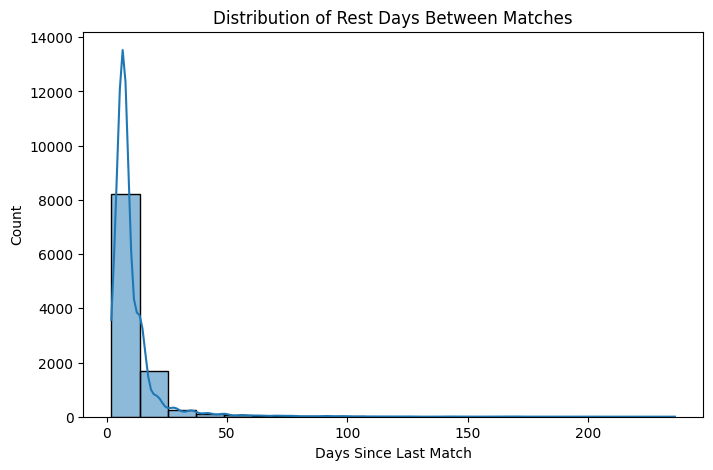

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(performance_data["days_since_last_match"], bins=20, kde=True)
plt.title("Distribution of Rest Days Between Matches")
plt.xlabel("Days Since Last Match")
plt.ylabel("Count")
plt.show()

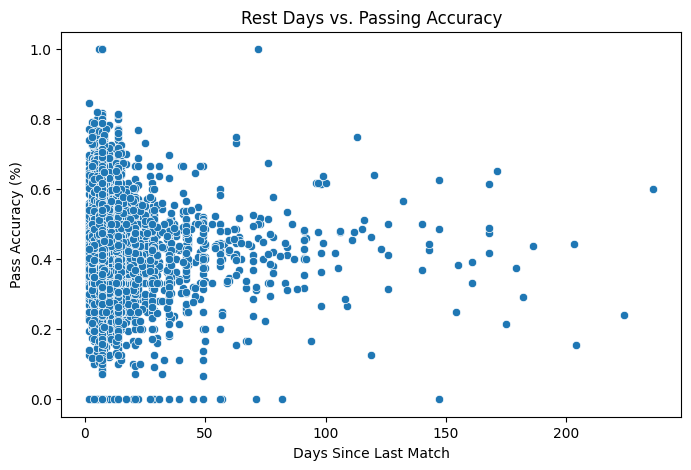

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=performance_data["days_since_last_match"], y=performance_data["pass_accuracy"])
plt.title("Rest Days vs. Passing Accuracy")
plt.xlabel("Days Since Last Match")
plt.ylabel("Pass Accuracy (%)")
plt.show()

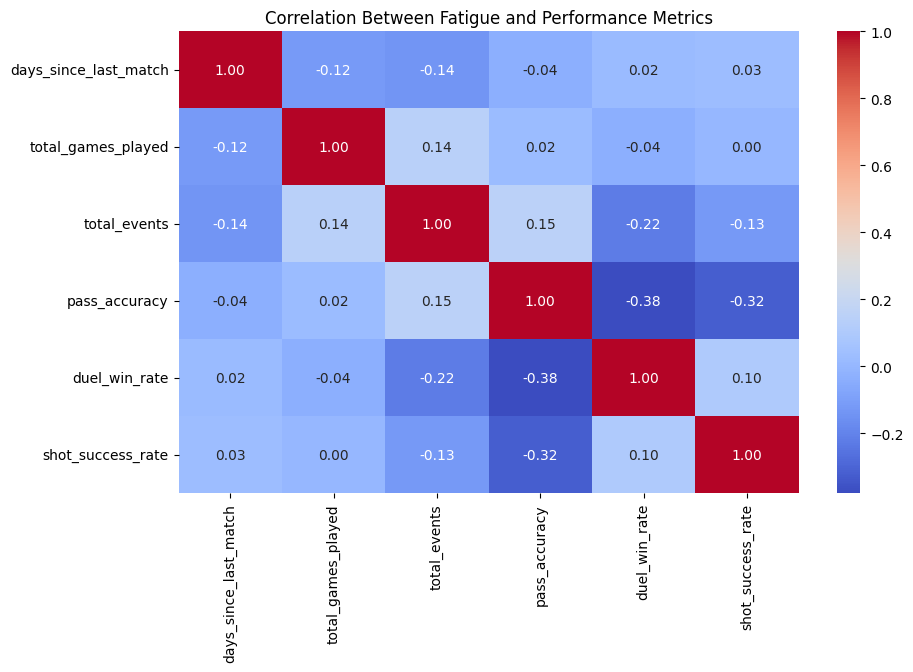

In [ ]:
correlation_matrix = performance_data[[
    "days_since_last_match", "total_games_played","total_events", "pass_accuracy", "duel_win_rate", "shot_success_rate"
]].corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Fatigue and Performance Metrics")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: for nice plot aesthetics
sns.set(style="whitegrid", context="notebook")


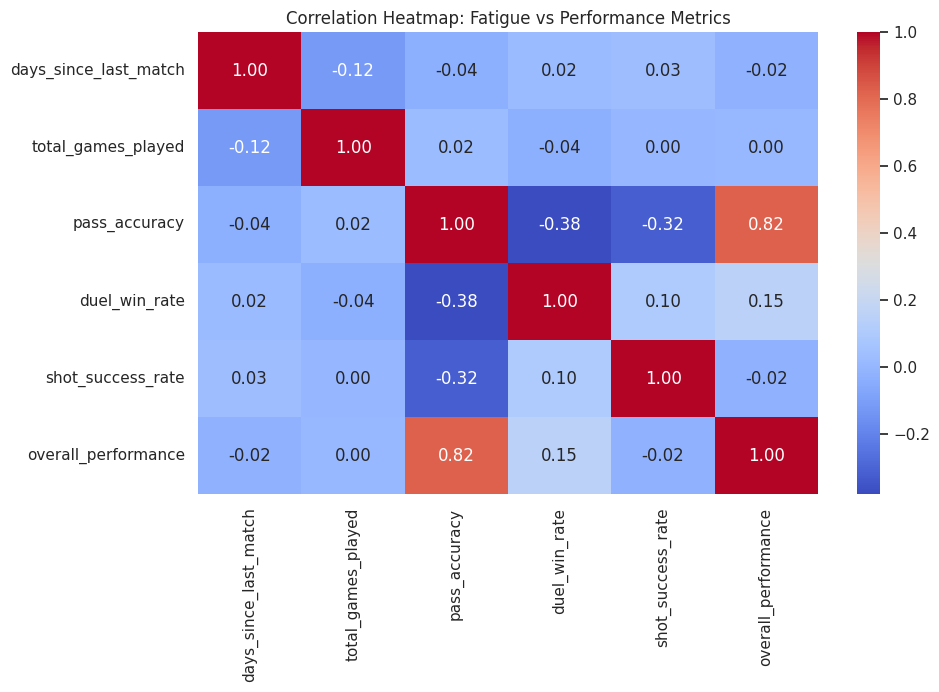

In [ ]:
# Select relevant numeric columns
eda_cols = [
    "days_since_last_match", "total_games_played",
    "pass_accuracy", "duel_win_rate", "shot_success_rate", "overall_performance"
]

plt.figure(figsize=(10, 6))
sns.heatmap(performance_data[eda_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Fatigue vs Performance Metrics")
plt.show()


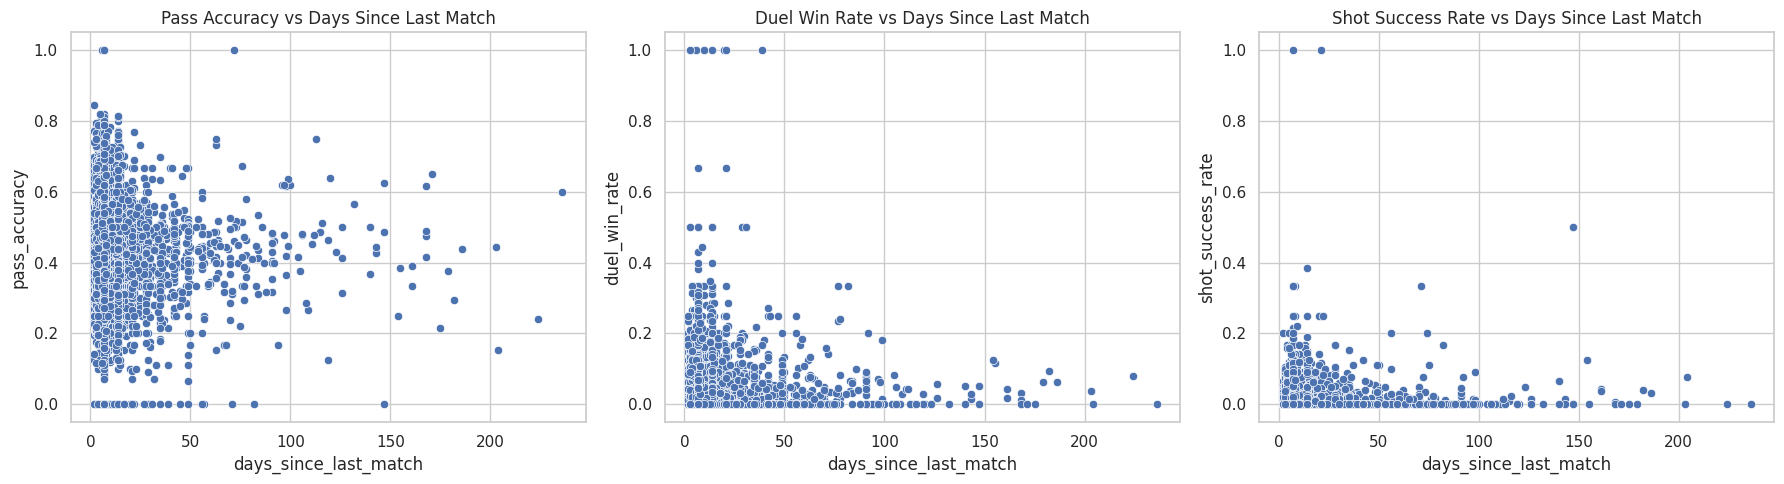

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=performance_data, x="days_since_last_match", y="pass_accuracy", ax=axs[0])
axs[0].set_title("Pass Accuracy vs Days Since Last Match")

sns.scatterplot(data=performance_data, x="days_since_last_match", y="duel_win_rate", ax=axs[1])
axs[1].set_title("Duel Win Rate vs Days Since Last Match")

sns.scatterplot(data=performance_data, x="days_since_last_match", y="shot_success_rate", ax=axs[2])
axs[2].set_title("Shot Success Rate vs Days Since Last Match")

plt.tight_layout()
plt.show()


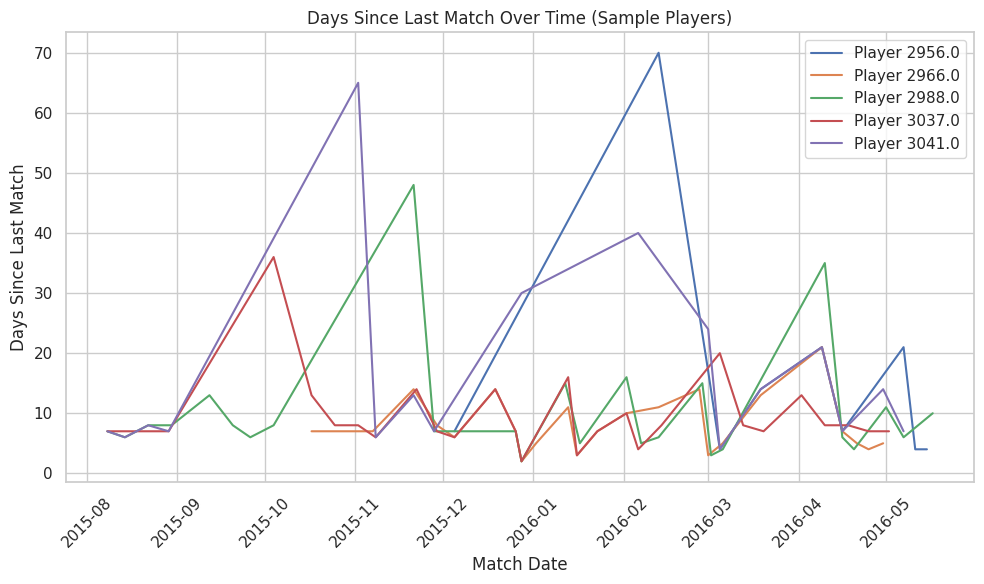

In [ ]:
# Select a few random players
sample_players = performance_data["player_id"].dropna().unique()[:5]

plt.figure(figsize=(10, 6))
for player_id in sample_players:
    player_df = performance_data[performance_data["player_id"] == player_id]
    plt.plot(player_df["match_date"], player_df["days_since_last_match"], label=f"Player {player_id}")

plt.legend()
plt.title("Days Since Last Match Over Time (Sample Players)")
plt.xlabel("Match Date")
plt.ylabel("Days Since Last Match")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


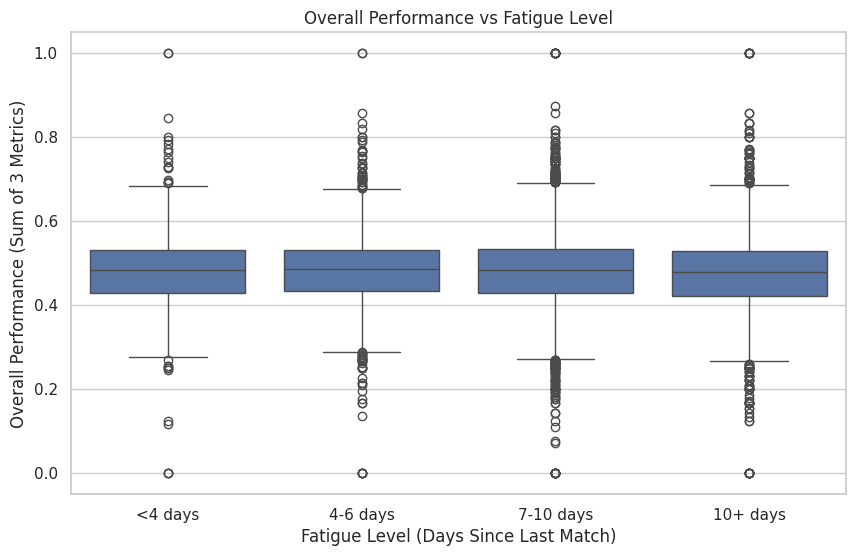

In [ ]:
# Create fatigue bins
performance_data["fatigue_level"] = pd.cut(
    performance_data["days_since_last_match"],
    bins=[-1, 3, 6, 10, 100],
    labels=["<4 days", "4-6 days", "7-10 days", "10+ days"]
)

# Boxplot of overall performance by fatigue level
plt.figure(figsize=(10, 6))
sns.boxplot(data=performance_data, x="fatigue_level", y="overall_performance")
plt.title("Overall Performance vs Fatigue Level")
plt.xlabel("Fatigue Level (Days Since Last Match)")
plt.ylabel("Overall Performance (Sum of 3 Metrics)")
plt.show()


## Linear Regression


In [ ]:
# Sort by player and match date
performance_data = performance_data.sort_values(by=["player_id", "match_date"])

# Define rolling window (e.g., 3 games)
rolling_window = 3

# Rolling averages for past performance
for metric in ["pass_accuracy", "duel_win_rate", "shot_success_rate"]:
    performance_data[f"hist_{metric}"] = (
        performance_data.groupby("player_id")[metric]
        .shift(1)  # exclude current match
        .rolling(window=rolling_window, min_periods=1)
        .mean()
    )

performance_data["overall_performance"] = (
    performance_data["pass_accuracy"] +
    performance_data["duel_win_rate"] +
    performance_data["shot_success_rate"]
)


In [ ]:
# Select features and target variable
X = performance_data[["days_since_last_match", "total_events", "total_games_played"]]
y = performance_data["overall_performance"]  # Change to 'duel_win_rate' or 'shot_success_rate' for other analyses

# Ensure no NaN or infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.replace([np.inf, -np.inf], np.nan).dropna()

# Check if dataset is empty after filtering
if X.shape[0] == 0 or y.shape[0] == 0:
    raise ValueError("Dataset contains no valid numerical values for regression. Check preprocessing.")

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.3f}")
print(f"R² Score: {r2:.3f}")


Mean Absolute Error: 0.069
R² Score: -0.004


Pass-Acuracy- Model 1 (Historical only) - MAE: 0.062 R²: 0.355
Pass-Acuracy- Model 2 (Historical + Fatigue) - MAE: 0.062 R²: 0.363
                     Feature  Coefficient
0         hist_pass_accuracy     0.708938
2           total_events_log     0.011194
3     total_games_played_log    -0.001345
1  days_since_last_match_log     0.000661


<ipython-input-90-26d5730b589f>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coeff_df, x="Coefficient", y="Feature", palette="coolwarm")


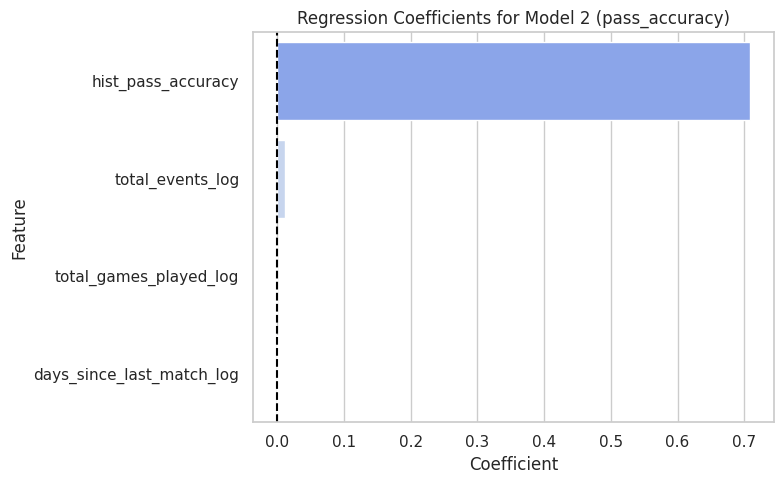

In [ ]:
features_hist_only = ["hist_pass_accuracy"]
target = "pass_accuracy"  # or "duel_win_rate", etc.

df_model1 = performance_data.dropna(subset=features_hist_only + [target])
X1 = df_model1[features_hist_only]
y1 = df_model1[target]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
model1 = LinearRegression().fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)

mae1 = mean_absolute_error(y1_test, y1_pred)
r2_1 = r2_score(y1_test, y1_pred)
print("Pass-Acuracy- Model 1 (Historical only) - MAE:", round(mae1, 3), "R²:", round(r2_1, 3))

fatigue_features = ["days_since_last_match", "total_games_played", "total_events"]

for col in fatigue_features:
    performance_data[f"{col}_sqrt"] = np.sqrt(performance_data[col])

for col in fatigue_features:
    performance_data[f"{col}_double"] = (performance_data[col])**2

for col in fatigue_features:
    performance_data[f"{col}_log"] = np.log2(performance_data[col])

performance_data["rest_x_games"] = performance_data["days_since_last_match"] * performance_data["total_games_played"]
performance_data["rest_x_events"] = performance_data["days_since_last_match"] * performance_data["total_events"]
performance_data["games_x_events"] = performance_data["total_games_played"] * performance_data["total_events"]

features_all = features_hist_only + ["days_since_last_match_log", "total_events_log", "total_games_played_log"]


df_model2 = performance_data.dropna(subset=features_all + [target])
X2 = df_model2[features_all]
y2 = df_model2[target]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
model2 = LinearRegression().fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)

mae2 = mean_absolute_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)
print("Pass-Acuracy- Model 2 (Historical + Fatigue) - MAE:", round(mae2, 3), "R²:", round(r2_2, 3))

# Display regression coefficients for Model 2
coeff_df = pd.DataFrame({
    "Feature": X2.columns,
    "Coefficient": model2.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

print(coeff_df)

plt.figure(figsize=(8, 5))
sns.barplot(data=coeff_df, x="Coefficient", y="Feature", palette="coolwarm")
plt.title(f"Regression Coefficients for Model 2 ({target})")
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()


Duel-Acuracy- Model 1 (Historical only) - MAE: 0.028 R²: 0.123
Duel-Acuracy- Model 2 (Historical + Fatigue) - MAE: 0.028 R²: 0.176
                     Feature  Coefficient
0         hist_duel_win_rate     0.396845
2           total_events_log    -0.010301
1  days_since_last_match_log    -0.001166
3     total_games_played_log     0.000639


<ipython-input-88-9ae519c248b8>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coeff_df, x="Coefficient", y="Feature", palette="coolwarm")


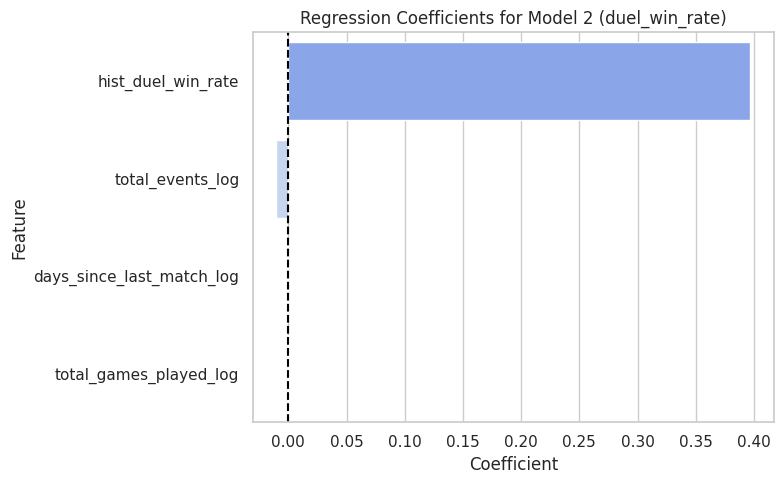

In [ ]:
features_hist_only = ["hist_duel_win_rate"]
target = "duel_win_rate"  # or "duel_win_rate", etc.

df_model1 = performance_data.dropna(subset=features_hist_only + [target])
X1 = df_model1[features_hist_only]
y1 = df_model1[target]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
model1 = LinearRegression().fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)

mae1 = mean_absolute_error(y1_test, y1_pred)
r2_1 = r2_score(y1_test, y1_pred)
print("Duel-Acuracy- Model 1 (Historical only) - MAE:", round(mae1, 3), "R²:", round(r2_1, 3))

fatigue_features = ["days_since_last_match", "total_games_played", "total_events"]

for col in fatigue_features:
    performance_data[f"{col}_sqrt"] = np.sqrt(performance_data[col])

for col in fatigue_features:
    performance_data[f"{col}_double"] = (performance_data[col])**2

for col in fatigue_features:
    performance_data[f"{col}_log"] = np.log2(performance_data[col])

performance_data["rest_x_games"] = performance_data["days_since_last_match"] * performance_data["total_games_played"]
performance_data["rest_x_events"] = performance_data["days_since_last_match"] * performance_data["total_events"]
performance_data["games_x_events"] = performance_data["total_games_played"] * performance_data["total_events"]

features_all = features_hist_only + ["days_since_last_match_log", "total_events_log", "total_games_played_log"]

# features_all = features_hist_only + ["days_since_last_match", "total_games_played", 'total_events'] + ["days_since_last_match_squared", "total_games_played_squared", 'total_events_squared']

df_model2 = performance_data.dropna(subset=features_all + [target])
X2 = df_model2[features_all]
y2 = df_model2[target]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
model2 = LinearRegression().fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)

mae2 = mean_absolute_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)
print("Duel-Acuracy- Model 2 (Historical + Fatigue) - MAE:", round(mae2, 3), "R²:", round(r2_2, 3))

# Display regression coefficients for Model 2
coeff_df = pd.DataFrame({
    "Feature": X2.columns,
    "Coefficient": model2.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

print(coeff_df)

plt.figure(figsize=(8, 5))
sns.barplot(data=coeff_df, x="Coefficient", y="Feature", palette="coolwarm")
plt.title(f"Regression Coefficients for Model 2 ({target})")
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()


Shot-Acuracy- Model 1 (Historical only) - MAE: 0.014 R²: 0.047
-Acuracy- Model 2 (Historical + Fatigue) - MAE: 0.015 R²: 0.061
                     Feature  Coefficient
0     hist_shot_success_rate     0.360411
2           total_events_log    -0.002694
3     total_games_played_log     0.000432
1  days_since_last_match_log     0.000002


<ipython-input-91-5003692c2799>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=coeff_df, x="Coefficient", y="Feature", palette="coolwarm")


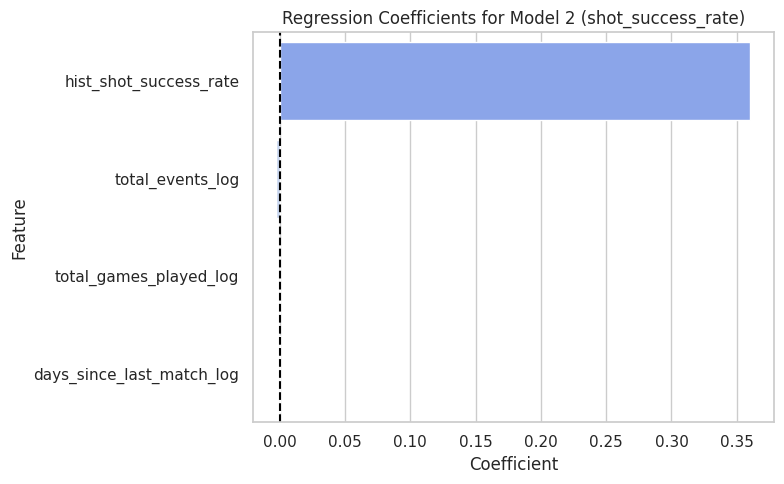

In [ ]:
features_hist_only = ["hist_shot_success_rate"]
target = "shot_success_rate"  # or "duel_win_rate", etc.

df_model1 = performance_data.dropna(subset=features_hist_only + [target])
X1 = df_model1[features_hist_only]
y1 = df_model1[target]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
model1 = LinearRegression().fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)

mae1 = mean_absolute_error(y1_test, y1_pred)
r2_1 = r2_score(y1_test, y1_pred)
print("Shot-Acuracy- Model 1 (Historical only) - MAE:", round(mae1, 3), "R²:", round(r2_1, 3))

fatigue_features = ["days_since_last_match", "total_games_played", "total_events"]

for col in fatigue_features:
    performance_data[f"{col}_sqrt"] = np.sqrt(performance_data[col])

for col in fatigue_features:
    performance_data[f"{col}_double"] = (performance_data[col])**2

for col in fatigue_features:
    performance_data[f"{col}_log"] = np.log2(performance_data[col])

performance_data["rest_x_games"] = performance_data["days_since_last_match"] * performance_data["total_games_played"]
performance_data["rest_x_events"] = performance_data["days_since_last_match"] * performance_data["total_events"]
performance_data["games_x_events"] = performance_data["total_games_played"] * performance_data["total_events"]

features_all = features_hist_only + ["days_since_last_match_log", "total_events_log", "total_games_played_log"]

df_model2 = performance_data.dropna(subset=features_all + [target])
X2 = df_model2[features_all]
y2 = df_model2[target]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
model2 = LinearRegression().fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)

mae2 = mean_absolute_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)
print("-Acuracy- Model 2 (Historical + Fatigue) - MAE:", round(mae2, 3), "R²:", round(r2_2, 3))

# Display regression coefficients for Model 2
coeff_df = pd.DataFrame({
    "Feature": X2.columns,
    "Coefficient": model2.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

print(coeff_df)

plt.figure(figsize=(8, 5))
sns.barplot(data=coeff_df, x="Coefficient", y="Feature", palette="coolwarm")
plt.title(f"Regression Coefficients for Model 2 ({target})")
plt.axvline(0, color='black', linestyle='--')
plt.tight_layout()
plt.show()


## Cluster Analysis

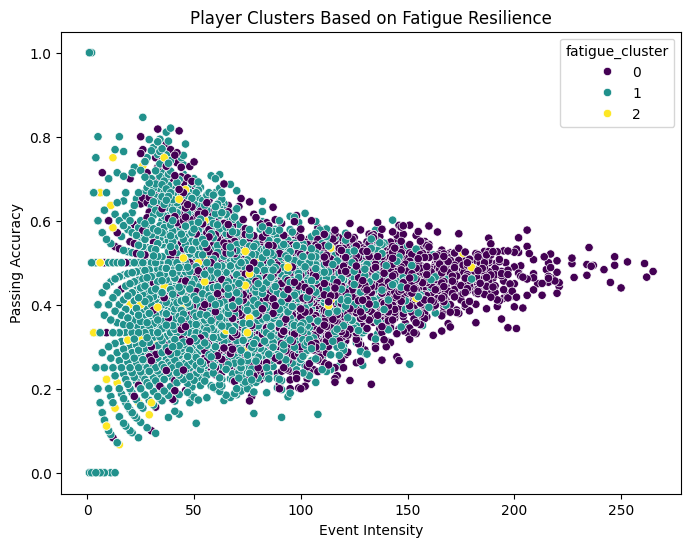

In [ ]:
# Select clustering features
clustering_features = performance_data[["days_since_last_match", "total_games_played", "total_events", "pass_accuracy"]]

# Handle missing or infinite values
clustering_features = clustering_features.replace([np.inf, -np.inf], np.nan).dropna()

# Ensure dataset is not empty
if clustering_features.shape[0] == 0:
    raise ValueError("No valid data available for clustering. Check preprocessing steps.")

# Standardize the data
scaler = StandardScaler()
clustering_features_scaled = scaler.fit_transform(clustering_features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Set n_init explicitly to avoid warnings
performance_data = performance_data.loc[clustering_features.index]  # Ensure aligned indices
performance_data["fatigue_cluster"] = kmeans.fit_predict(clustering_features_scaled)

# Plot clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=performance_data, x="total_events", y="pass_accuracy", hue="fatigue_cluster", palette="viridis")
plt.title("Player Clusters Based on Fatigue Resilience")
plt.xlabel("Event Intensity")
plt.ylabel("Passing Accuracy")
plt.show()


## RF


In [ ]:

# Decision Tree Model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# XGBoost Model
xgb_model = XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print(f"Decision Tree R² Score: {r2_score(y_test, y_pred_tree):.3f}")
print(f"XGBoost R² Score: {r2_score(y_test, y_pred_xgb):.3f}")


Decision Tree R² Score: -0.843
XGBoost R² Score: -0.110


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

performance_data["overall_performance"] = (
    performance_data["pass_accuracy"] +
    performance_data["duel_win_rate"] +
    performance_data["shot_success_rate"]
)

# Define input (Fatigue Features) and target (Performance Metrics)
X = performance_data[["hist_pass_accuracy","hist_duel_win_rate", "hist_shot_success_rate", "days_since_last_match", "total_games_played", "total_events"]]
y = performance_data["overall_performance"]  # Change to "duel_win_rate" or "shot_success_rate" if needed

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict performance impact
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
r2 = r2_score(y_test, y_pred_rf)
print(f"Fatigue Impact Prediction R² Score: {r2:.3f}")

# Create DataFrame for feature importances
importances_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(importances_df)


Fatigue Impact Prediction R² Score: 0.191
                  Feature  Importance
0      hist_pass_accuracy    0.361103
5            total_events    0.205992
1      hist_duel_win_rate    0.164235
4      total_games_played    0.098774
2  hist_shot_success_rate    0.096952
3   days_since_last_match    0.072944


In [ ]:
# Define input (Fatigue Features) and target (Performance Metrics)
X = performance_data[["hist_pass_accuracy","hist_duel_win_rate", "hist_shot_success_rate"]]
y = performance_data["overall_performance"]  # Change to "duel_win_rate" or "shot_success_rate" if needed

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict performance impact
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
r2 = r2_score(y_test, y_pred_rf)
print(f"Fatigue Impact Prediction R² Score: {r2:.3f}")

# Create DataFrame for feature importances
importances_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(importances_df)


Fatigue Impact Prediction R² Score: 0.120
                  Feature  Importance
0      hist_pass_accuracy    0.526217
1      hist_duel_win_rate    0.287238
2  hist_shot_success_rate    0.186545


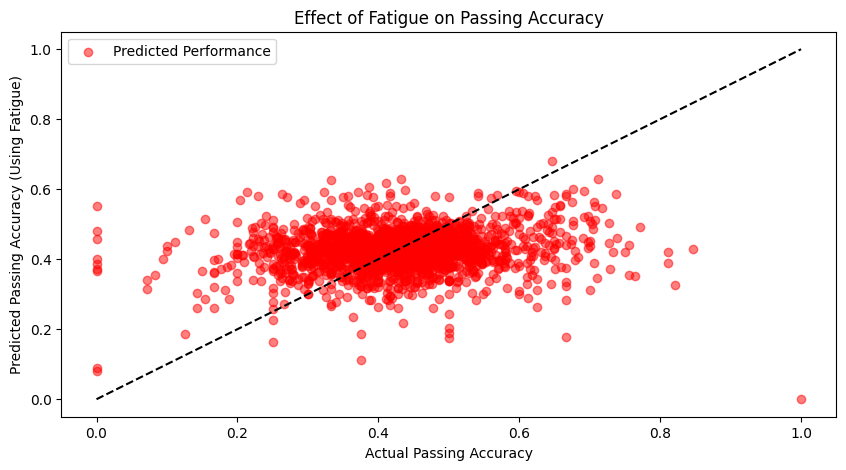

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label="Predicted Performance", color="red")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle="dashed", color="black")  # 1:1 line
plt.title("Effect of Fatigue on Passing Accuracy")
plt.xlabel("Actual Passing Accuracy")
plt.ylabel("Predicted Passing Accuracy (Using Fatigue)")
plt.legend()
plt.show()


## Arima

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


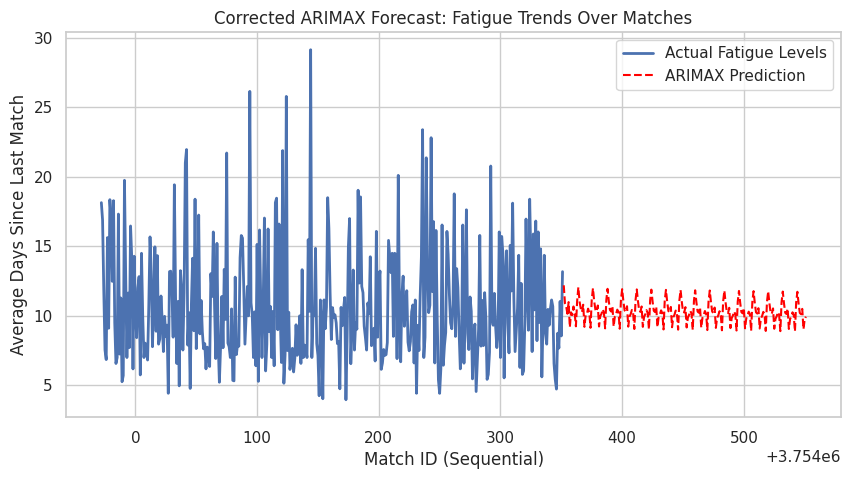

                                      SARIMAX Results                                       
Dep. Variable:                days_since_last_match   No. Observations:                  380
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood               -1066.190
Date:                              Sun, 30 Mar 2025   AIC                           2148.379
Time:                                      23:21:06   BIC                           2179.622
Sample:                                           0   HQIC                          2160.793
                                              - 380                                         
Covariance Type:                                opg                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
total_games_played     0.0974      0.036      2.733      0.006       0.028       0

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ✅ Use only "days_since_last_match" as the target variable
fatigue_series = (
    performance_data.groupby("match_id")["days_since_last_match"]  # Only select the target variable
    .mean()
    .reset_index()
    .sort_values("match_id")
)

# Set match_id as index
fatigue_series.set_index("match_id", inplace=True)

# ✅ Keep "total_games_played" as the exogenous variable
exog_features = (
    performance_data.groupby("match_id")[["total_games_played"]]
    .mean()
    .reset_index()
    .set_index("match_id")
)

# Ensure `exog_features` aligns with `fatigue_series`
exog_features = exog_features.reindex(fatigue_series.index)

# ✅ Fit ARIMAX model (now using a univariate target)
arima_model = SARIMAX(fatigue_series, exog=exog_features, order=(2,1,2), seasonal_order=(1,1,1,12))
arima_result = arima_model.fit()

# ✅ Generate future match IDs
num_forecast_steps = 200
future_match_ids = np.arange(fatigue_series.index[-1] + 1, fatigue_series.index[-1] + 1 + num_forecast_steps)

# ✅ Ensure exogenous variables for forecasting exist
future_exog = pd.DataFrame(
    {"total_games_played": [exog_features["total_games_played"].mean()] * num_forecast_steps},
    index=future_match_ids
)

# ✅ Generate Forecast with ARIMAX
arima_forecast = arima_result.get_forecast(steps=num_forecast_steps, exog=future_exog).predicted_mean

# ✅ Plot Improved ARIMAX Forecast
plt.figure(figsize=(10,5))
plt.plot(fatigue_series.index, fatigue_series, label="Actual Fatigue Levels", linewidth=2)
plt.plot(future_match_ids, arima_forecast, label="ARIMAX Prediction", linestyle="dashed", color="red")
plt.title("Corrected ARIMAX Forecast: Fatigue Trends Over Matches")
plt.xlabel("Match ID (Sequential)")
plt.ylabel("Average Days Since Last Match")
plt.legend()
plt.show()

# Print model summary
print(arima_result.summary())


In [ ]:
performance_data["overall_performance"] = (
    performance_data["pass_accuracy"] +
    performance_data["duel_win_rate"] +
    performance_data["shot_success_rate"]
)

# Aggregate overall performance per match (you can do per player if needed)
performance_series = (
    performance_data.groupby("match_id")["overall_performance"]
    .mean()
    .reset_index()
    .sort_values("match_id")
    .set_index("match_id")
)

# Average fatigue indicators per match
exog_vars = (
    performance_data.groupby("match_id")[["days_since_last_match", "total_games_played", "total_events"]]
    .mean()
    .reset_index()
    .set_index("match_id")
)

# Align with performance_series
exog_vars = exog_vars.reindex(performance_series.index)

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    performance_series,
    exog=exog_vars,
    order=(2, 1, 2),            # you can tune this
    seasonal_order=(1, 1, 1, 12)  # optional seasonal component
)

result = model.fit()
print(result.summary())


                                      SARIMAX Results                                       
Dep. Variable:                  overall_performance   No. Observations:                  380
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood                 894.551
Date:                              Mon, 31 Mar 2025   AIC                          -1769.102
Time:                                      02:12:34   BIC                          -1730.048
Sample:                                           0   HQIC                         -1753.585
                                              - 380                                         
Covariance Type:                                opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
days_since_last_match -8.752e-05      0.000     -0.419      0.675      -0.00

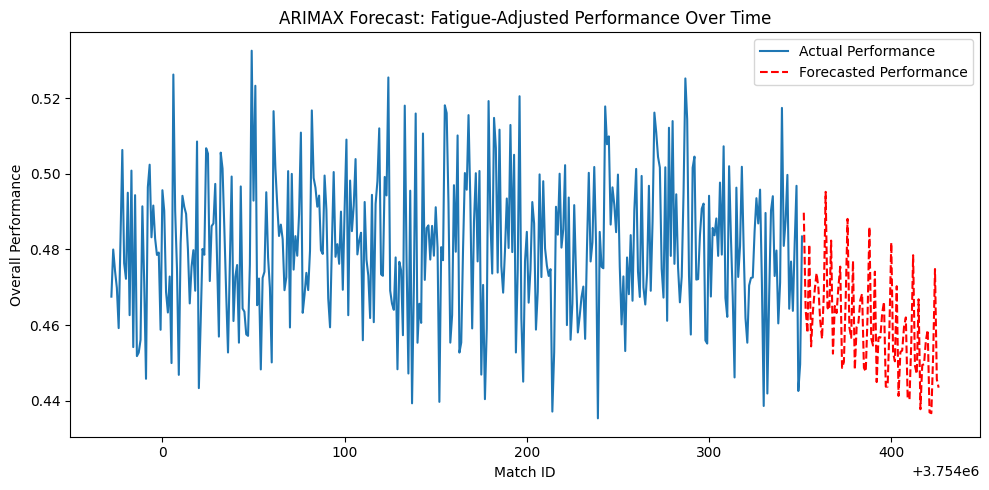

In [ ]:
# Predict next 10–50 matches
n_forecast = 75
future_index = np.arange(performance_series.index[-1] + 1, performance_series.index[-1] + 1 + n_forecast)

# Dummy exog input for forecast
future_exog = pd.DataFrame({
    "days_since_last_match": [exog_vars["days_since_last_match"].mean()] * n_forecast,
    "total_games_played": [exog_vars["total_games_played"].mean()] * n_forecast,
    "total_events": [exog_vars["total_events"].mean()] * n_forecast,
}, index=future_index)

forecast = result.get_forecast(steps=n_forecast, exog=future_exog).predicted_mean

# Plot
plt.figure(figsize=(10, 5))
plt.plot(performance_series.index, performance_series, label="Actual Performance")
plt.plot(future_index, forecast, linestyle="--", color="red", label="Forecasted Performance")
plt.xlabel("Match ID")
plt.ylabel("Overall Performance")
plt.title("ARIMAX Forecast: Fatigue-Adjusted Performance Over Time")
plt.legend()
plt.tight_layout()
plt.show()


## LSTM

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

performance_data["overall_performance"] = (
    performance_data["pass_accuracy"] +
    performance_data["duel_win_rate"] +
    performance_data["shot_success_rate"]
)

# Define input (Fatigue Features) and target (Performance Metrics)
X = performance_data[["hist_pass_accuracy","hist_duel_win_rate", "hist_shot_success_rate", "days_since_last_match", "total_games_played", "total_events"]]
y = performance_data["overall_performance"]  # Change to "duel_win_rate" or "shot_success_rate" if needed

# Replace inf and drop rows with NaNs
X = X.replace([np.inf, -np.inf], np.nan)
X = X.dropna()
y = y.loc[X.index]  # Make sure y matches filtered X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Recreate clean train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)

class LSTMModel(nn.Module):
    def __init__(self, input_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size=50, batch_first=True)
        self.fc = nn.Linear(50, 1)
        self._init_weights()

    def _init_weights(self):
        for name, param in self.named_parameters():
            if "weight" in name:
                nn.init.xavier_uniform_(param)  # prevents exploding weights
            elif "bias" in name:
                nn.init.constant_(param, 0)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

lstm_model = LSTMModel(input_size=X_train.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(lstm_model.parameters(), lr=1e-4)


# Train model
for epoch in range(100):
    optimizer.zero_grad()
    output = lstm_model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    torch.nn.utils.clip_grad_norm_(lstm_model.parameters(), max_norm=1.0)
    optimizer.step()

print("LSTM Training Complete")


LSTM Training Complete


Any NaNs in raw tensor: tensor(False)
Raw prediction shape: torch.Size([2086, 1])
tensor([[0.0084],
        [0.0868],
        [0.1221],
        [0.0586],
        [0.0959]])


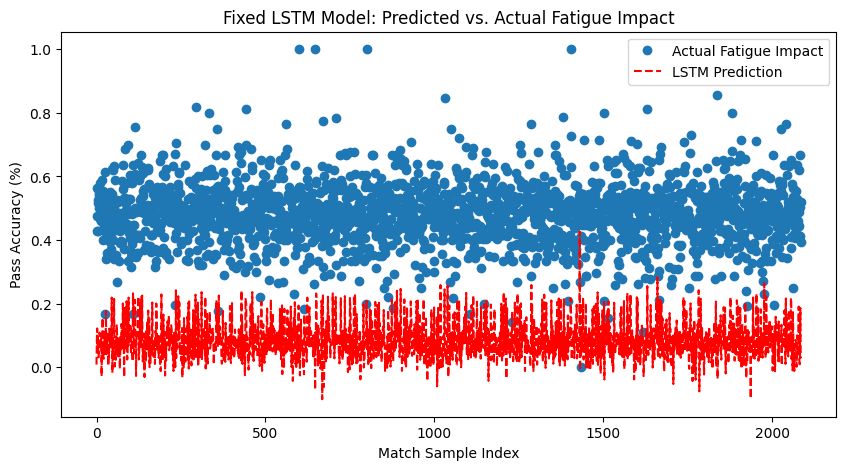

[0.00842603 0.08680526 0.12213486 ... 0.18624377 0.03035206 0.03234661]


In [ ]:

# Ensure model is in evaluation mode
lstm_model.eval()

# Generate LSTM predictions
with torch.no_grad():
    pred_tensor = lstm_model(X_test_tensor)
    print("Any NaNs in raw tensor:", torch.isnan(pred_tensor).any())
    print("Raw prediction shape:", pred_tensor.shape)
    print(pred_tensor[:5])
    y_pred_lstm = lstm_model(X_test_tensor).numpy().flatten()

# **Plot Fixed LSTM Results**
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual Fatigue Impact", marker="o", linestyle="None")
plt.plot(y_pred_lstm, label="LSTM Prediction", linestyle="dashed", color="red")
plt.title("Fixed LSTM Model: Predicted vs. Actual Fatigue Impact")
plt.xlabel("Match Sample Index")
plt.ylabel("Pass Accuracy (%)")
plt.legend()
plt.show()


print(y_pred_lstm)

In [ ]:
print("NaNs in y_test:", np.isnan(y_test.values).sum())
print("NaNs in y_pred_lstm:", np.isnan(y_pred_lstm).sum())
print("Length of y_test:", len(y_test.values))
print("Length of y_pred_lstm:", len(y_pred_lstm))


NaNs in y_test: 0
NaNs in y_pred_lstm: 0
Length of y_test: 2086
Length of y_pred_lstm: 2086


In [ ]:
print("Any NaNs in X_train after scaling?", np.isnan(X_train).any())
print("Max value:", np.max(X_train))
print("Min value:", np.min(X_train))


Any NaNs in X_train after scaling? False
Max value: 18.768856543915376
Min value: -4.681868153434895


In [ ]:
from sklearn.metrics import r2_score
import numpy as np

# Convert y_test to numpy
y_test_np = y_test.values

# Create mask for valid entries (non-NaN in both arrays)
valid_mask = ~np.isnan(y_test_np) & ~np.isnan(y_pred_lstm)

# Filter arrays
y_test_clean = y_test_np[valid_mask]
y_pred_clean = y_pred_lstm[valid_mask]

# Compute R² only on valid data
baseline_score = r2_score(y_test_clean, y_pred_clean)

baseline_score = r2_score(y_test, y_pred_lstm)
importances = {}
X_test_df = pd.DataFrame(X_test, columns=X.columns)

for i, col in enumerate(X_test_df.columns):
    X_test_perm = X_test_df.copy()
    X_test_perm[col] = np.random.permutation(X_test_perm[col].values)

    X_test_perm_tensor = torch.tensor(X_test_perm.values, dtype=torch.float32).unsqueeze(1)
    with torch.no_grad():
        y_perm_pred = lstm_model(X_test_perm_tensor).numpy().flatten()

    perm_score = r2_score(y_test, y_perm_pred)
    importances[col] = baseline_score - perm_score

# Convert to DataFrame
importances_df = pd.DataFrame.from_dict(importances, orient='index', columns=["Importance"])
importances_df = importances_df.sort_values(by="Importance", ascending=False)
print(importances_df)


                        Importance
hist_duel_win_rate        0.437691
hist_shot_success_rate    0.339145
hist_pass_accuracy        0.310647
total_events              0.091472
total_games_played        0.071995
days_since_last_match     0.055209


In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

lstm_mae = mean_absolute_error(y_test, y_pred_lstm)
lstm_mse = mean_squared_error(y_test, y_pred_lstm)

# Create a DataFrame with results
results_df = pd.DataFrame({
    "Model": [ "LSTM"],
    "Mean Absolute Error (MAE)": [lstm_mae],
    "Mean Squared Error (MSE)": [lstm_mse]
})

# Display results
print(results_df.to_string(index=False))


Model  Mean Absolute Error (MAE)  Mean Squared Error (MSE)
 LSTM                   0.398718                  0.168392
